<a href="https://colab.research.google.com/github/a-foote/DATA586G8_FraudDetector/blob/alyssa/Fraud_Detector.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

RANDOM_SEED = 123
DEVICE = ('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
#read data and review spread of data
df = pd.read_csv('creditcard.csv')
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
#confirm no null values exist
df.isnull().sum().max()

0

In [ ]:
#list column names
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

Text(0.5, 1.0, 'Class Distributions')

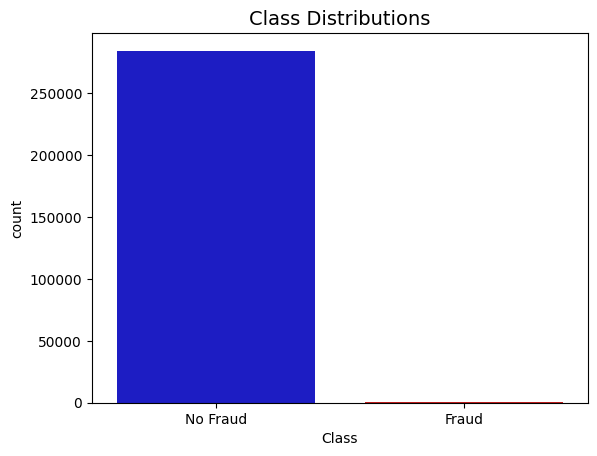

In [5]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=df, palette=colors)
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.title('Class Distributions', fontsize=14)

In [6]:
#scale amount and time

df['amount_scaled'] = RobustScaler().fit_transform(df['Amount'].values.reshape(-1,1))
df['time_scaled'] = RobustScaler().fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)

#move scaled columns to columns 0,1
amount_scaled = df['amount_scaled']
scaled_time = df['time_scaled']
df.drop(['amount_scaled', 'time_scaled'], axis=1, inplace=True)
df.insert(0, 'amount_scaled', amount_scaled)
df.insert(1, 'time_scaled', scaled_time)

In [7]:
# Train and Test split
X = df.iloc[:, 0:-1]
y = df.iloc[:, -1]
X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=69)

In [ ]:
#merge trainval back together
trainval = pd.concat([X_trainval, y_trainval],axis=1)
trainval.head()

,amount_scaled,time_scaled,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
131209,2.039405,-0.060750,0.973182,-0.398310,-0.275475,-0.163117,-0.274127,-0.916093,0.517064,-0.281366,...,0.251531,-0.270088,-1.141467,0.052946,0.143815,0.001378,1.096442,-0.149123,0.018936,0
229791,0.081464,0.720873,0.385273,0.596798,-0.560534,-1.506014,1.016335,-1.420794,1.762729,-0.736705,...,0.027217,0.146134,0.722909,-0.195606,1.280429,0.083790,0.911662,-0.267488,-0.248234,0
53773,-0.269964,-0.452942,-1.044519,1.104374,0.587008,0.144883,0.399978,0.563941,-0.099757,0.658616,...,0.059259,-0.122502,-0.482541,-0.108243,-1.156561,-0.523187,0.244448,-0.003397,0.087018,0
265976,-0.176762,0.909738,-0.909553,0.273070,-0.401854,-2.200167,3.732417,3.236887,0.692304,0.420759,...,-0.017176,-0.394718,-0.779348,-0.282044,0.707524,-0.144915,0.070718,-0.215493,-0.303012,0
274535,-0.282401,0.956062,-1.584358,0.089006,-0.872386,-0.286382,0.967318,-1.206637,0.338463,0.274947,...,-0.518471,0.230511,1.412809,0.805656,-0.394218,-0.474548,-0.161696,0.626393,0.122114,0


In [ ]:
#undersampling to balance the training and validation set
num_frauds = len(trainval[trainval["Class"]==1])
frauds = trainval.loc[trainval['Class'].values == 1, :]
no_frauds = trainval.drop(index = frauds.index)
no_frauds = no_frauds.sample(n = num_frauds)
balanced_trainval = pd.concat([no_frauds, frauds])

Text(0.5, 1.0, 'Training & Validation Class Distributions')

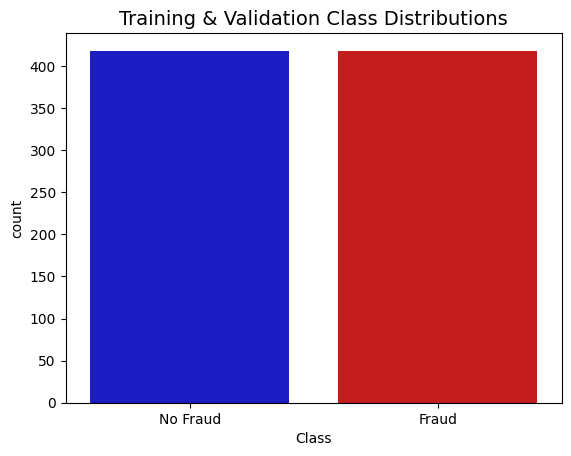

In [ ]:
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=balanced_trainval, palette=colors)
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.title('Undersampling Training & Validation Class Distributions', fontsize=14)

In [ ]:
# Train and validation split
X_trainval = balanced_trainval.iloc[:, 0:-1]
y_trainval = balanced_trainval.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.05, stratify=y_trainval, random_state=21)

In [ ]:
#form train, validation, test sets
train_dataset = pd.concat([X_train, y_train],axis=1)
val_dataset = pd.concat([X_val, y_val],axis=1)
test_dataset = pd.concat([X_test, y_test],axis=1)

In [ ]:
#save train, validation, and test sets to csv
train_dataset.to_csv('fraud_trainset.csv')
val_dataset.to_csv('fraud_valset.csv')
test_dataset.to_csv('fraud_testset.csv')

In [8]:
#oversamping usine SMOTE to balanace training and validation
smote = SMOTE(random_state=586)
X_trainval_smote, y_trainval_smote = smote.fit_resample(X_trainval,y_trainval)

Text(0.5, 1.0, 'SMOTE Training & Validation Class Distributions')

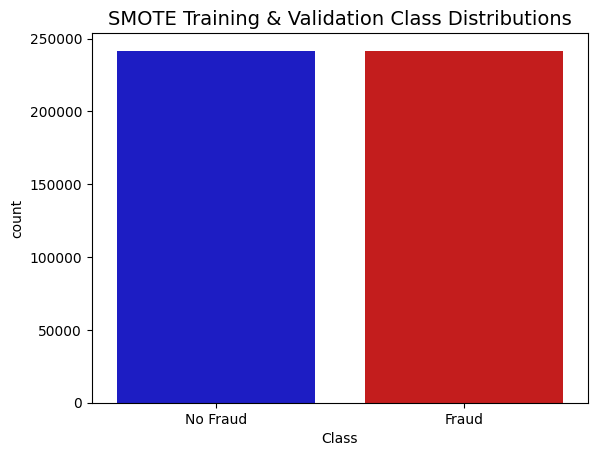

In [9]:
#visualize SMOTE Distribution
colors = ["#0101DF", "#DF0101"]

sns.countplot(x='Class', data=pd.concat([X_trainval_smote, y_trainval_smote],axis=1), 
              palette=colors)
plt.xticks(np.arange(2), ('No Fraud', 'Fraud'))
plt.title('SMOTE Training & Validation Class Distributions', fontsize=14)

In [10]:
#split and form smote training and validation sets
X_train_smote, X_val_smote, y_train_smote, y_val_smote = train_test_split(X_trainval_smote, y_trainval_smote, test_size=0.05, stratify=y_trainval_smote, random_state=21)
train_dataset_smote = pd.concat([X_train_smote, y_train_smote],axis=1)
val_dataset_smote = pd.concat([X_val_smote, y_val_smote],axis=1)

In [11]:
#save smote train and validation sets to csv
train_dataset_smote.to_csv('fraud_trainset_smote.csv')
val_dataset_smote.to_csv('fraud_valset_smote.csv')